## Data Exploration for Yelp Check-In Dataset

This is a notebook that explores the sample Yelp dataset provided by Kaggle (https://www.kaggle.com/yelp-dataset/yelp-dataset).

This covers user data that maps to users compliments, date of joining and review metadata among other things.

## Imports and Parameters

In [1]:
pip install findspark py4j ipywidgets matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
# For local installations, use findspark to locate Spark.
import findspark
findspark.init("/Users/ana/server/spark-3.0.1-bin-hadoop2.7")

import pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import isnan, when, count, col, split, size

import pandas as pd
import ipywidgets as widgets
from IPython.display import display

from matplotlib import pyplot as plt
%matplotlib inline

#Seaborn for data visualization
import seaborn as sns

# Pandas Options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
sc = pyspark.SparkContext(appName="data-exploration-yelp")
spark = SparkSession(sc)

### Parameters

In [5]:
yelp_checkin = "../../yelp-raw/yelp_academic_dataset_checkin.json"

### Initial Data Exploration

We are going to explore each dataset and understand various statistical analysis of the data.

#### Check-In Dataset Overview

In [6]:
checkin_df = spark.read.json(yelp_checkin)

In [7]:
checkin_df.show(5,False)

+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
checkin_df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)



In [9]:
checkin_df.count()

175187

### Checkin Transforms

For checkins, we only have two columns, `dates` and `business_id`. Dates are in a string format. Here we split the string by commas, and get the amount of checkins based on the size of the array column of the split `checkin_dates`.

In [10]:
split_checkin_df = checkin_df.withColumn("checkin_dates", split(col("date"), ","))

In [11]:
split_checkin_df.show(5, False)

+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
with_checkin_count_df = split_checkin_df.withColumn("amount_of_checkins", size(col("checkin_dates")))

In [36]:
with_checkin_count_df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- checkin_dates: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- amount_of_checkins: integer (nullable = false)



In [13]:
with_checkin_count_df.show(5, False)

+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
# Dropped date and checkin_dates column for now, as we are exploring count data.
# The data is really dense and can be too much for the notebook to render in a DataFrame. So we'll omit for now,
# until we need to explore this with say the new COVID19 data from Yelp.
final_checkin_df = with_checkin_count_df.drop("date", "checkin_dates")

In [26]:
final_checkin_df.show(20, False)

+----------------------+------------------+
|business_id           |amount_of_checkins|
+----------------------+------------------+
|--1UhMGODdWsrMastO9DZw|7                 |
|--6MefnULPED_I942VcFNA|189               |
|--7zmmkVg-IMGaXbuVd0SQ|193               |
|--8LPVSo5i0Oo61X01sV9A|1                 |
|--9QQLMTbFzLJ_oT-ON3Xw|38                |
|--9e1ONYQuAa-CB_Rrw7Tw|2942              |
|--DaPTJW3-tB1vP-PfdTEg|97                |
|--DdmeR16TRb3LsjG0ejrQ|30                |
|--EF5N7P70J_UYBTPypYlA|3                 |
|--EX4rRznJrltyn-34Jz1w|17                |
|--FBCX-N37CMYDfs790Bnw|552               |
|--FLdgM0GNpXVMn74ppCGw|16                |
|--FnvijzY20d1nk9H7fk9w|9                 |
|--GM_ORV2cYS-h38DSaCLw|38                |
|--I7YYLada0tSLkORTHb5Q|116               |
|--KCl2FvVQpvjzmZSPyviA|107               |
|--KQsXc-clkO7oHRqGzSzg|778               |
|--Ni3oJ4VOqfOEu7Sj2Vzg|1                 |
|--Rsj71PBe31h5YljVseKA|309               |
|--S62v0QgkqQaVUhFnNHrw|68      

### Exploration of Distribution of Checkins

In [27]:
filtered_checkin = final_checkin_df.groupBy(col("amount_of_checkins")).count().sort(col("count").desc())
filtered_checkin.show(25, False)

+------------------+-----+
|amount_of_checkins|count|
+------------------+-----+
|1                 |16109|
|2                 |11452|
|3                 |9119 |
|4                 |7404 |
|5                 |6457 |
|6                 |5405 |
|7                 |4748 |
|8                 |4361 |
|9                 |3861 |
|10                |3526 |
|11                |3102 |
|12                |2893 |
|13                |2695 |
|14                |2550 |
|15                |2429 |
|16                |2223 |
|17                |2066 |
|18                |2042 |
|19                |1804 |
|20                |1775 |
|21                |1637 |
|22                |1562 |
|23                |1481 |
|24                |1385 |
|25                |1364 |
+------------------+-----+
only showing top 25 rows



In [28]:
final_checkin_df.sort(col("amount_of_checkins").desc()).show(5, False)

+----------------------+------------------+
|business_id           |amount_of_checkins|
+----------------------+------------------+
|FaHADZARwnY4yvlvpnsfGA|151671            |
|JmI9nslLD7KZqRr__Bg6NQ|129355            |
|yQab5dxZzgBLTEHCw9V7_w|59306             |
|5LNZ67Yw9RD6nf4_UhXOjw|48606             |
|RESDUcs7fIiihp38-d6_6g|45313             |
+----------------------+------------------+
only showing top 5 rows



In [29]:
checkin_pd = filtered_checkin.toPandas()

In [30]:
checkin_pd.head(10)

,amount_of_checkins,count
0,1,16109
1,2,11452
2,3,9119
3,4,7404
4,5,6457
5,6,5405
6,7,4748
7,8,4361
8,9,3861
9,10,3526


#### Checkin Distribution Chart

Here we can see most checkins fall within the head end of the distribution. Most popular checkin counts are under 10,000, and are pretty clustered especially around 1000 checkins or less. The highest checkin count is at 151,671 checkins for McCarran International Airport in Las Vegas.  

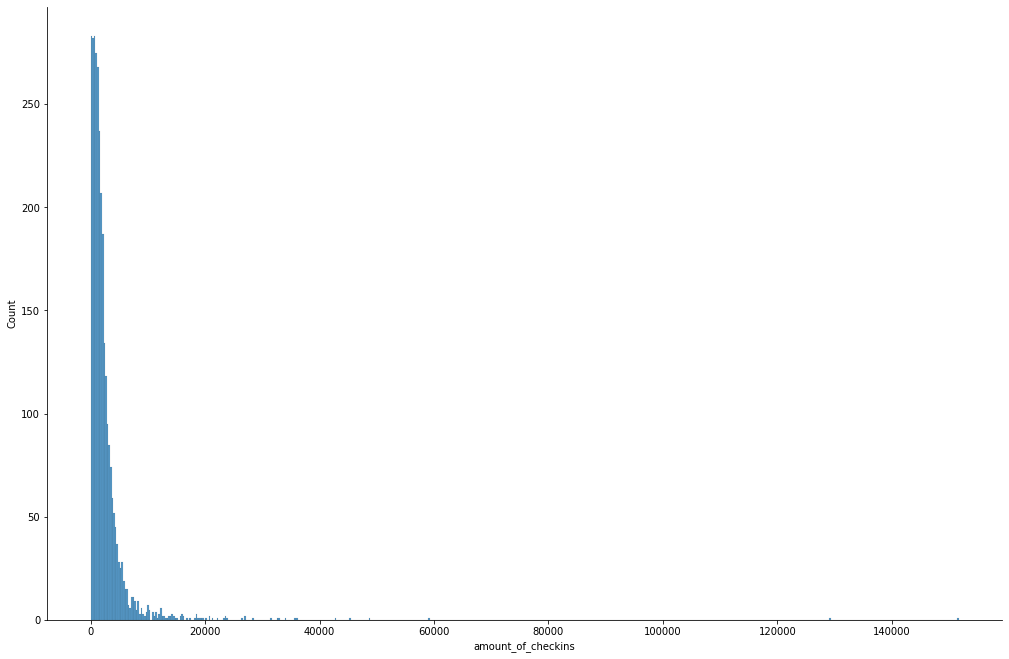

In [31]:
ax = sns.displot(checkin_pd['amount_of_checkins'])

fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.show()

In [32]:
sorted_checkin_pd = checkin_pd.sort_values(by=['amount_of_checkins'], ascending=False)
sorted_checkin_pd

,amount_of_checkins,count
2220,151671,1
1903,129355,1
2590,59306,1
2586,48606,1
2946,45313,1
...,...,...
4,5,6457
3,4,7404
2,3,9119
1,2,11452


In [33]:
final_checkin_pd = final_checkin_df.toPandas()

In [34]:
sorted_final_checkin_pd = final_checkin_pd.sort_values(by=['amount_of_checkins'], ascending=False)
sorted_final_checkin_pd.head(30)

,business_id,amount_of_checkins
45595,FaHADZARwnY4yvlvpnsfGA,151671
57044,JmI9nslLD7KZqRr__Bg6NQ,129355
170858,yQab5dxZzgBLTEHCw9V7_w,59306
17280,5LNZ67Yw9RD6nf4_UhXOjw,48606
77422,RESDUcs7fIiihp38-d6_6g,45313
53697,IZivKqtHyz4-ts8KsnvMrA,42818
125329,hihud--QRriCYZw1zZvW4g,35979
80463,SMPbvZLSMMb7KU76YNYMGg,35863
93048,Wxxvi3LZbHNIDwJ-ZimtnA,34080
141364,na4Th5DrNauOv-c43QQFvA,33031


#### Total Checkin Count Exploration

Here we visualize the most popular checkins. Overall, they generally are airports or popular places within Las Vegas in this dataset. The two most popular are both airports, with over 100k+ checkins. 

After that, we generally fall more normally into the distribution with it decreasing from 50,000. 

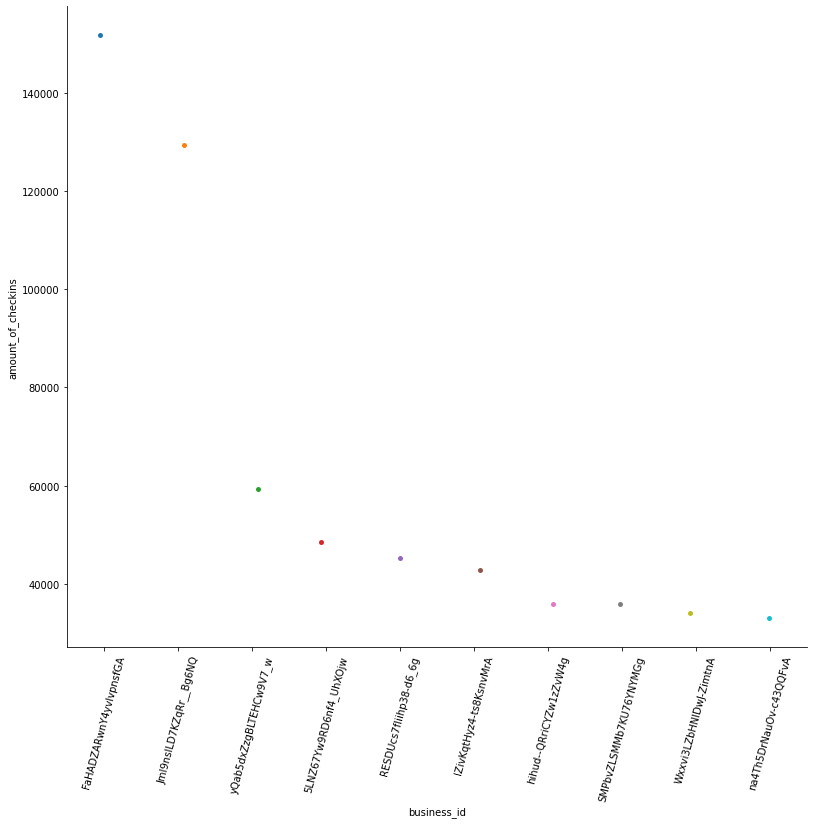

In [35]:
ax = sns.catplot(x = 'business_id', y = "amount_of_checkins", data = sorted_final_checkin_pd[:10])
ax.set_xticklabels(rotation=75)

fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.show()

### Write Final Checkins Dataframe

In [39]:
# Drop Dates as we don't need string based date columns in the finalized datasets.
finalized_checkin_df = with_checkin_count_df.drop(col("date"))

In [38]:
finalized_checkin_df.write.parquet("../../yelp_transformed/checkin_v1")